# **Analysis of the presidential elections in the European Union from 1952 to 2024**

## **Project plan:**

- Открытие файла
- Таблица с количеством парламентариев от каждой партии в ЕС в 2024 году
- Таблица с количеством парламентариев от каждой партии в ЕС в 2019 году
- Таблица с количеством парламентариев от каждой партии в ЕС в 2014 году
- Сбор данных по самым популярным партиям в странах ЕС, в формате индекса партии лидера
- Страны Европы с одной партией лидером за последние три периода выборов
- Страны Европы с хотя бы двумя одинаковыми партиями победителями за последние три периода выборов
- Страны Европы за 2024 год
- Общий тренд развития паритий

In [835]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_excel('/Users/gleb/Downloads/проект.xlsx') #Открываю данные из таблицы в экселе

party_short = [
    'ЕНП',   # Европейская народная партия
    'RE',    # Renew Europe
    'ПЕС',   # Партия европейских социалистов
    'АЛДЕ',  # Альянс либералов и демократов за Европу
    'PfE',   # Patriots for Europe
    'ЕЗ',    # Европейская партия зелёных
    'ESN',   # Europe of Sovereign Nations
    'ИДП',   # Партия идентичности и демократии
    'ЕКР',   # Партия европейских консерваторов и реформистов
    'ЕЛ',    # Европейские левые
    'GUE', # Confederal Group of the European United Left - Nordic Green Left
    'EFDD',  # Europe of Freedom and Direct Democracy Group
    'ENF',   # Europe of Nations and Freedom Group
    ''  # Независимые
]
# Список партий
parties = []
parties_ex = []
for i in range(2, 16):
    parties.append(df.iloc[81, i])
parties.append('Другая партия')

choice_24 = {}
choice_19 = {}
choice_14 = {}
choice_parties = []
for i in range(0, 81): #Перебор строк
    for j in range(2, 16): #Перебор столбцов
        choice_parties.append(df.iloc[i, j]) #Обращение к результатам выборов в таблице в одно строке и создание списка этиха данных
        if i < 27 and j == 15: #Проверка на год 2024
            choice_24[df.iloc[i, 1]] = choice_parties #Создание кортежа, где ключ - страна, а значение места в парламенте от партий
        if i > 26 and i < 54 and j == 15: #Проверка на год 2019
            choice_19[df.iloc[i, 1]] = choice_parties #Создание кортежа, где ключ - страна, а значение места в парламенте от партий
        if i > 53 and j == 15: #Проверка на год 2014
            choice_14[df.iloc[i, 1]] = choice_parties #Создание кортежа, где ключ - страна, а значение места в парламенте от партий
    choice_parties = [] #Оставляем список пустым, чтобы при последующих итерациях не сохранялись данные, полученные в предыдущих

#Список цветов для партий
color = ['#e74c3c', '#3498db', '#27ae60', '#e67e22', '#9b59b6', '#2ecc71', '#8e6e53', '#ffb6c1', '#1abc9c', '#d980fa', '#16a085', '#34495e', '#f1c40f', '#2c3e50', '#ecf0f1']
color_map = {}
for i in range(len(parties)):
    color_map[parties[i]] = color[i]

# Список стран Европы
countries_list = []
for i in range(0, 27):
    countries_list.append(df.iloc[i, 1])

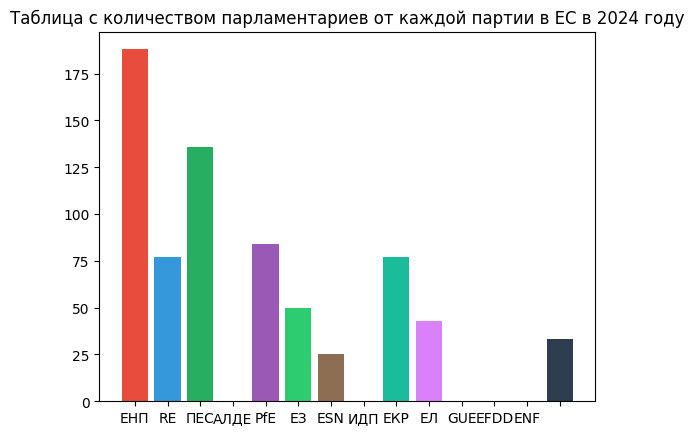

In [837]:
p = []

# Обращение к различным значениям, чтобы собрать список с местами партий в парламенте
for i1 in range(2, 16):
    c = 0
    for i2 in range(0, 27):
        c += df.iloc[i2, i1]
    p.append(c)

p1 = p

categories = party_short
values = p

colors = color
plt.bar(categories, values, color=color)
plt.title('Таблица с количеством парламентариев от каждой партии в ЕС в 2024 году')
plt.show()

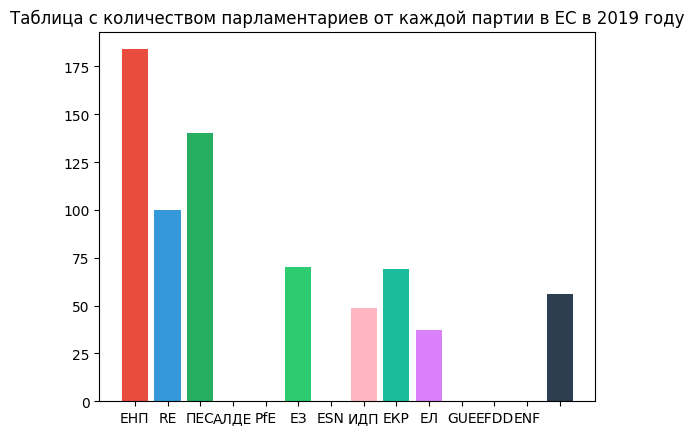

In [839]:
p = []

# Обращение к различным значениям, чтобы собрать список с местами партий в парламенте
for i1 in range(2, 16):
    c = 0
    for i2 in range(26, 54):
        c += df.iloc[i2, i1]
    p.append(c)

categories = party_short
values = p

colors = color
plt.bar(categories, values, color=color)
plt.title('Таблица с количеством парламентариев от каждой партии в ЕС в 2019 году')
plt.show()

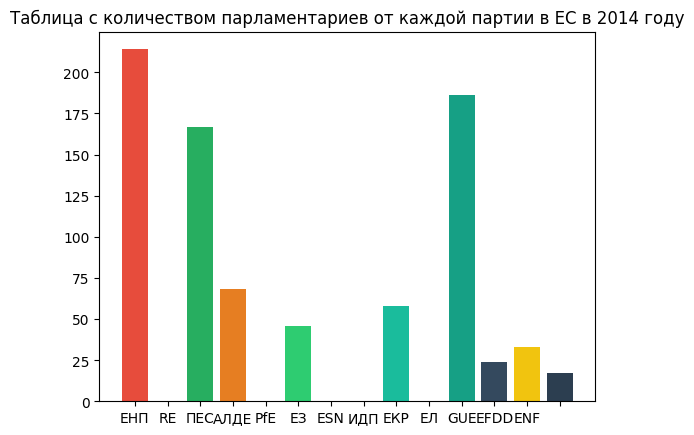

In [841]:
p = []

# Обращение к различным значениям, чтобы собрать список с местами партий в парламенте
for i1 in range(2, 16):
    c = 0
    for i2 in range(54, 81):
        c += df.iloc[i2, i1]
    p.append(c)

p2 = p

categories = party_short
values = p

colors = color
plt.bar(categories, values, color=color)
plt.title('Таблица с количеством парламентариев от каждой партии в ЕС в 2014 году')
plt.show()

In [843]:
countries = {}

# Сбор данных по самым популярным партиям в странах ЕС, в формате индекса партии лидера
for i1 in range(0, 27):
    c_2024 = []
    c_2019 = []
    c_2014 = []
    for i2 in range(2, 16):
        c_2024.append(df.iloc[i1, i2])
        c_2019.append(df.iloc[i1 + 27, i2])
        c_2014.append(df.iloc[i1 + 54, i2])
    max_index_2024 = c_2024.index(max(c_2024))
    max_index_2019 = c_2019.index(max(c_2019))
    max_index_2014 = c_2014.index(max(c_2014))
    countries[df.iloc[i1, 1]] = max_index_2024, max_index_2019, max_index_2014

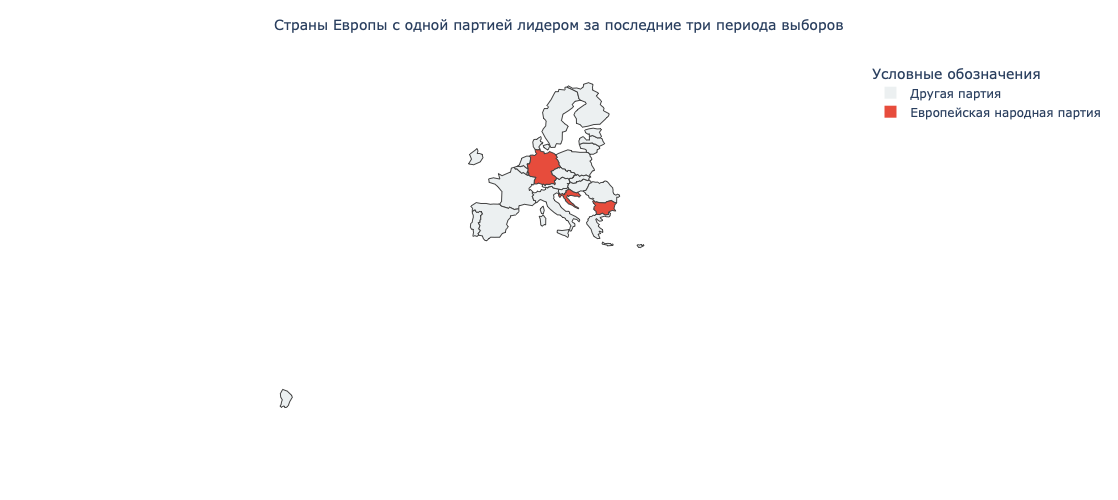

In [845]:
import geopandas as gpd
import plotly.express as px

# Отбор данных о партия где постоянно выигрывала одна и та же партия
party_map = {}
for j in range(len(countries_list)):
    if countries[countries_list[j]][0] == countries[countries_list[j]][1] and countries[countries_list[j]][0] == countries[countries_list[j]][2]:
        party_map[countries_list[j]] = parties[countries[countries_list[j]][1]]
    else:
        party_map[countries_list[j]] = 'Другая партия'

# Загружаем карту
url = 'https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip'
world = gpd.read_file(url)
europe = world[world['ADMIN'].isin(countries_list)].copy()

# Присваиваем партии странам
europe['party'] = europe['ADMIN'].map(party_map)
europe['legend_label'] = europe['party']


# Строим карту
fig = px.choropleth(
    europe,
    geojson=europe.geometry,
    locations=europe.index,
    color='legend_label',
    hover_name='ADMIN',
    projection='natural earth',
    color_discrete_map=color_map
)

fig.update_geos(fitbounds='locations', visible=False)

fig.update_layout(
    title={
        'text': 'Страны Европы с одной партией лидером за последние три периода выборов',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 14}
    },
    width=1000,
    height=500,
    legend_title_text='Условные обозначения'
)

fig.show()

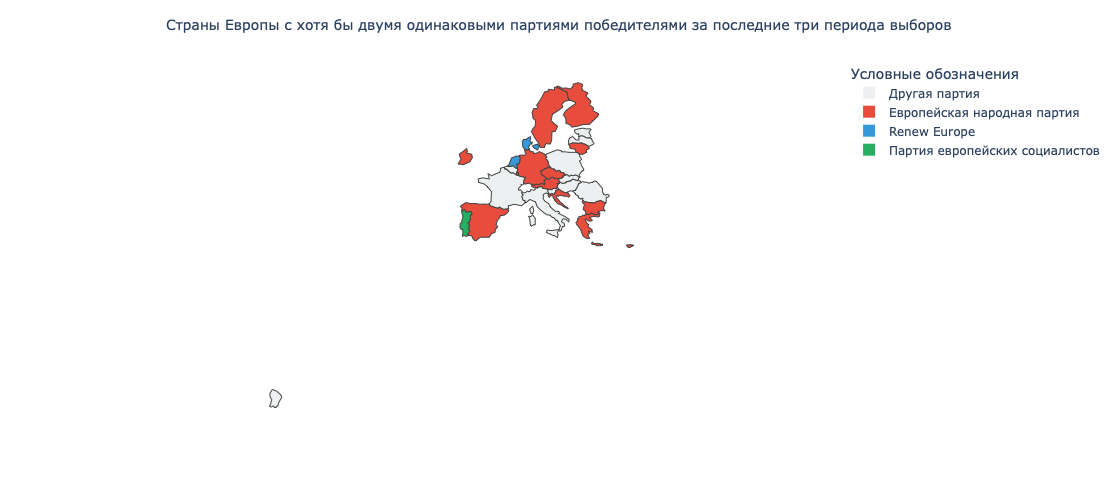

In [847]:
import geopandas as gpd
import plotly.express as px

# Отбор стран, где хотя бы два раза выиграла одна и та же партия
party_map2 = {}
for j in range(len(countries_list)):
    if countries[countries_list[j]][0] == countries[countries_list[j]][1]:
        party_map2[countries_list[j]] = parties[countries[countries_list[j]][0]]
    elif countries[countries_list[j]][0] == countries[countries_list[j]][2]:
        party_map2[countries_list[j]] = parties[countries[countries_list[j]][0]]
    elif countries[countries_list[j]][1] == countries[countries_list[j]][2]:
        party_map2[countries_list[j]] = parties[countries[countries_list[j]][2]]
    else:
        party_map2[countries_list[j]] = 'Другая партия'

# Загружаем карту
url = 'https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip'
world = gpd.read_file(url)
europe = world[world['ADMIN'].isin(countries_list)].copy()

# Присваиваем партии странам
europe['party'] = europe['ADMIN'].map(party_map2)
europe['legend_label'] = europe['party']


# Строим карту
fig = px.choropleth(
    europe,
    geojson=europe.geometry,
    locations=europe.index,
    color='legend_label',
    hover_name='ADMIN',
    projection='natural earth',
    color_discrete_map=color_map
)

fig.update_geos(fitbounds='locations', visible=False)

fig.update_layout(
    title={
        'text': 'Страны Европы с хотя бы двумя одинаковыми партиями победителями за последние три периода выборов',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 14}
    },
    width=1000,
    height=500,
    legend_title_text='Условные обозначения'
)

fig.show()

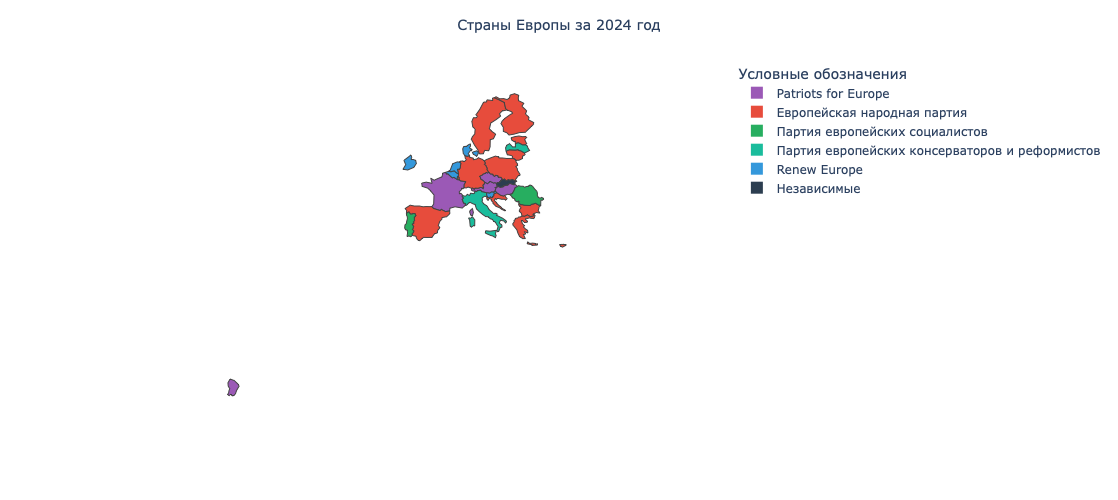

In [849]:
import geopandas as gpd
import plotly.express as px

# Отбор стран, в которых выигрывала какая-нибудь партия в 2024 году
party_map3 = {}
for j in range(len(countries_list)):
    party_map3[countries_list[j]] = parties[countries[countries_list[j]][0]]

# Загружаем карту
url = 'https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip'
world = gpd.read_file(url)
europe = world[world['ADMIN'].isin(countries_list)].copy()

# Присваиваем партии странам
europe['party'] = europe['ADMIN'].map(party_map3)
europe['legend_label'] = europe['party']


# Строим карту
fig = px.choropleth(
    europe,
    geojson=europe.geometry,
    locations=europe.index,
    color='legend_label',
    hover_name='ADMIN',
    projection='natural earth',
    color_discrete_map=color_map
)

fig.update_geos(fitbounds='locations', visible=False)

fig.update_layout(
    title={
        'text': 'Страны Европы за 2024 год',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 14}
    },
    width=1000,
    height=500,
    legend_title_text='Условные обозначения'
)

fig.show()

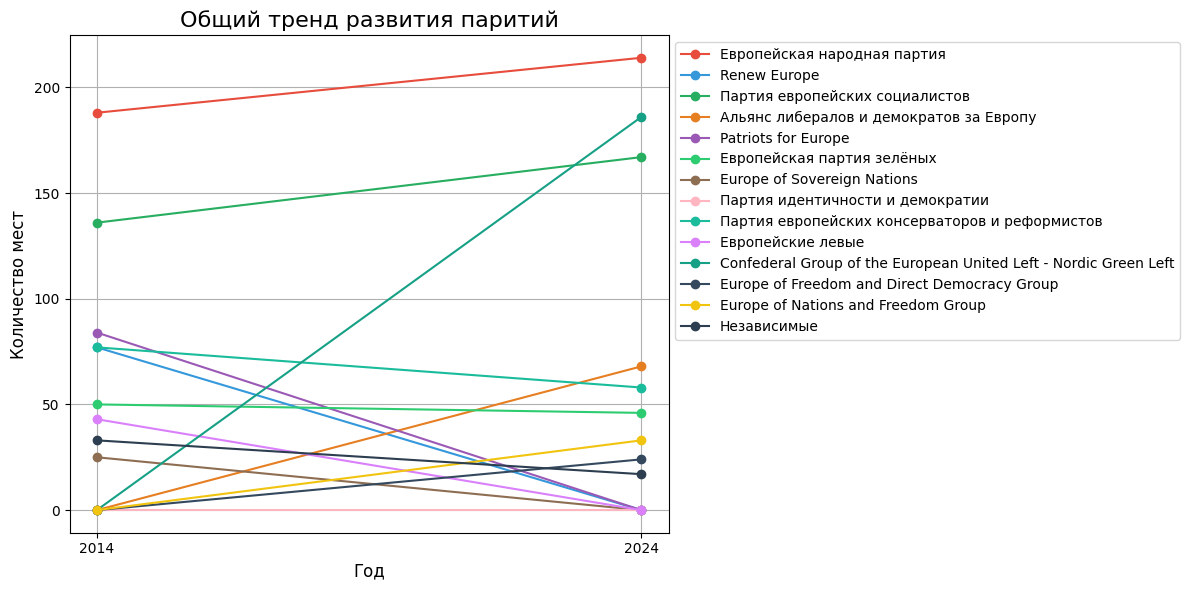

In [853]:
import pandas as pd
import matplotlib.pyplot as plt

# Создадим DataFrame
data = {'x': [2014, 2024]}
for i in range(len(parties) - 1):
    data[parties[i]] = p1[i], p2[i]

# Список партий (для удобства)
parties = list(data.keys())
parties.remove('x')

# Строим график
plt.figure(figsize=(12, 6))

for i, party in enumerate(parties):
    plt.plot(data['x'], data[party], label=party, color=color[i % len(color)], marker='o')

# Настройки графика
plt.title('Общий тренд развития паритий', fontsize=16)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Количество мест', fontsize=12)
plt.xticks(data['x'])
plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()